In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('car_data.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# Select the relevant features
X = df[['Year', 'Kms_Driven', 'Selling_Price', 'Fuel_Type', 'Transmission']]

In [6]:
X

,Year,Kms_Driven,Selling_Price,Fuel_Type,Transmission
0,2014,27000,3.35,Petrol,Manual
1,2013,43000,4.75,Diesel,Manual
2,2017,6900,7.25,Petrol,Manual
3,2011,5200,2.85,Petrol,Manual
4,2014,42450,4.60,Diesel,Manual
...,...,...,...,...,...
296,2016,33988,9.50,Diesel,Manual
297,2015,60000,4.00,Petrol,Manual
298,2009,87934,3.35,Petrol,Manual
299,2017,9000,11.50,Diesel,Manual


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [8]:
# Fill in missing values with the mean
X = X.fillna(X.mean())

In [9]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Create the target variable
y = df['Selling_Price']

In [11]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [13]:
# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [14]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


RMSE: 1.4748129690278343e-14


In [15]:
# Use cross-validation to tune the model hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'normalize': [True, False]}
grid = GridSearchCV(regressor, param_grid, cv=5)
grid.fit(X_train, y_train)
print('Best hyperparameters:', grid.best_params_)


Best hyperparameters: {'normalize': True}


In [17]:
import matplotlib.pyplot as plt 

In [18]:
from sklearn import metrics

In [19]:
import seaborn as sns 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


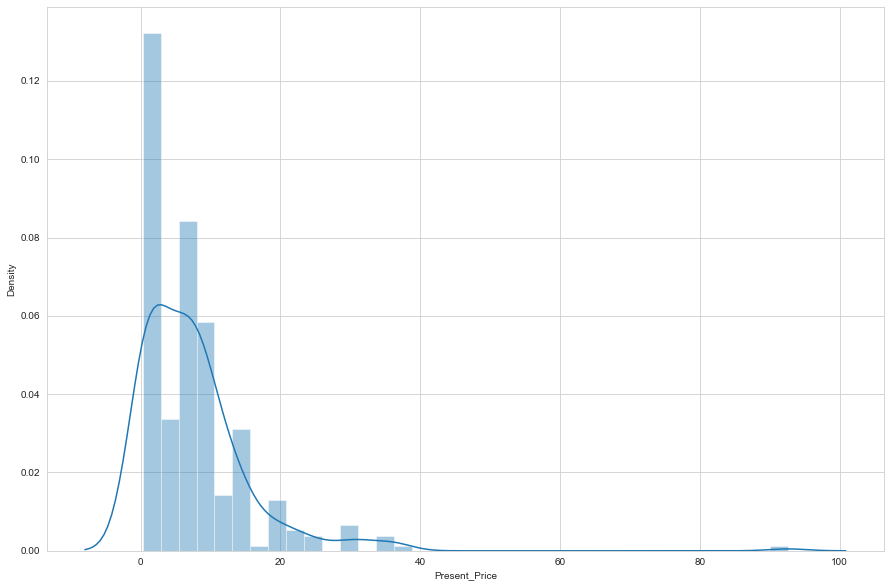

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.distplot(df.Present_Price)
plt.show()

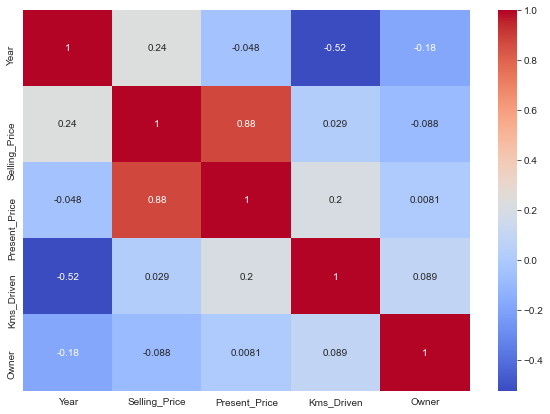

In [26]:
plt.figure(figsize=(10, 7))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [27]:
# Use the model to predict the price of a new car
new_car = [[2018, 2071, 0, 'Diesel', 'Manual']]
new_car_df = pd.DataFrame(new_car, columns=['Year', 'Kms_Driven', 'Selling_Price', 'Fuel_Type', 'Transmission'])
new_car_df = pd.get_dummies(new_car_df)
new_car_df = new_car_df.reindex(columns=X.columns, fill_value=0)
new_car_df_scaled = scaler.transform(new_car_df)
predicted_price = regressor.predict(new_car_df_scaled)
print('Predicted price:', predicted_price[0])

Predicted price: 5.5067062021407764e-14
